In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout

# Ustawienia parametrów
max_features = 20000  # liczba słów w słowniku
maxlen = 100  # maksymalna długość recenzji
batch_size = 32

# Załadowanie danych IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Przygotowanie danych (padding)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (25000, 100)
x_test shape: (25000, 100)


# Prosta RNN

In [3]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_rnn = model_rnn.fit(x_train, y_train,
                            epochs=10,
                            batch_size=batch_size,
                            validation_data=(x_test, y_test))

# Ocena modelu RNN
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy (Simple RNN): {test_acc_rnn:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.5302 - loss: 0.6899 - val_accuracy: 0.6048 - val_loss: 0.6476
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7181 - loss: 0.5570 - val_accuracy: 0.7744 - val_loss: 0.4986
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8320 - loss: 0.3911 - val_accuracy: 0.7917 - val_loss: 0.4571
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8760 - loss: 0.2995 - val_accuracy: 0.8067 - val_loss: 0.4849
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9180 - loss: 0.2190 - val_accuracy: 0.8045 - val_loss: 0.5154
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9011 - loss: 0.2467 - val_accuracy: 0.7924 - val_loss: 0.5256
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9424 - loss: 0.1633 - val_accuracy: 0.7954 - val_loss: 0.5785
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9473 - loss: 0.1547 - 

# LSTM

In [4]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train,
                              epochs=10,
                              batch_size=batch_size,
                              validation_data=(x_test, y_test))

# Ocena modelu LSTM
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy (LSTM): {test_acc_lstm:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.7436 - loss: 0.4985 - val_accuracy: 0.8411 - val_loss: 0.3748
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.9118 - loss: 0.2290 - val_accuracy: 0.8472 - val_loss: 0.3608
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9498 - loss: 0.1406 - val_accuracy: 0.8331 - val_loss: 0.4537
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.9680 - loss: 0.0878 - val_accuracy: 0.8384 - val_loss: 0.5426
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.9848 - loss: 0.0478 - val_accuracy: 0.8230 - val_loss: 0.8517
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.9855 - loss: 0.0426 - val_accuracy: 0.8237 - val_loss: 0.7894
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9912 - loss: 0.0264 - val_accuracy: 0.8304 - val_loss: 0.7154
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9939 - loss: 0.0190 - 

# Dwukierunkowa LSTM

In [5]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 128))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

history_bilstm = model_bilstm.fit(x_train, y_train,
                                  epochs=10,
                                  batch_size=batch_size,
                                  validation_data=(x_test, y_test))

# Ocena modelu Dwukierunkowa LSTM
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy (Bidirectional LSTM): {test_acc_bilstm:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 159ms/step - accuracy: 0.7298 - loss: 0.5095 - val_accuracy: 0.8453 - val_loss: 0.3510
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.9110 - loss: 0.2311 - val_accuracy: 0.8468 - val_loss: 0.3622
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.9571 - loss: 0.1249 - val_accuracy: 0.8294 - val_loss: 0.4271
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.9790 - loss: 0.0670 - val_accuracy: 0.8348 - val_loss: 0.6757
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9899 - loss: 0.0332 - val_accuracy: 0.8308 - val_loss: 0.6461
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.9961 - loss: 0.0158 - val_accuracy: 0.8194 - val_loss: 0.8889
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.8252 - val_loss: 0.9298
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 157ms/step - accuracy: 0.9976 -

# Głęboka LSTM

In [6]:
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 128))
model_deep_lstm.add(LSTM(128, return_sequences=True))
model_deep_lstm.add(LSTM(128))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_deep_lstm = model_deep_lstm.fit(x_train, y_train,
                                        epochs=10,
                                        batch_size=batch_size,
                                        validation_data=(x_test, y_test))

# Ocena modelu Głęboka LSTM
test_loss_deep_lstm, test_acc_deep_lstm = model_deep_lstm.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy (Deep LSTM): {test_acc_deep_lstm:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 181ms/step - accuracy: 0.7233 - loss: 0.5178 - val_accuracy: 0.8408 - val_loss: 0.3846
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 176ms/step - accuracy: 0.9037 - loss: 0.2416 - val_accuracy: 0.8141 - val_loss: 0.4455
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 183ms/step - accuracy: 0.9363 - loss: 0.1719 - val_accuracy: 0.8378 - val_loss: 0.4178
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 177ms/step - accuracy: 0.9632 - loss: 0.1049 - val_accuracy: 0.8380 - val_loss: 0.4648
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 173ms/step - accuracy: 0.9695 - loss: 0.0872 - val_accuracy: 0.8347 - val_loss: 0.5360
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 158ms/step - accuracy: 0.9843 - loss: 0.0506 - val_accuracy: 0.8086 - val_loss: 0.6023
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.9806 - loss: 0.0646 - val_accuracy: 0.8320 - val_loss: 0.7315
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.9929 -

# Przedstawienie wyników

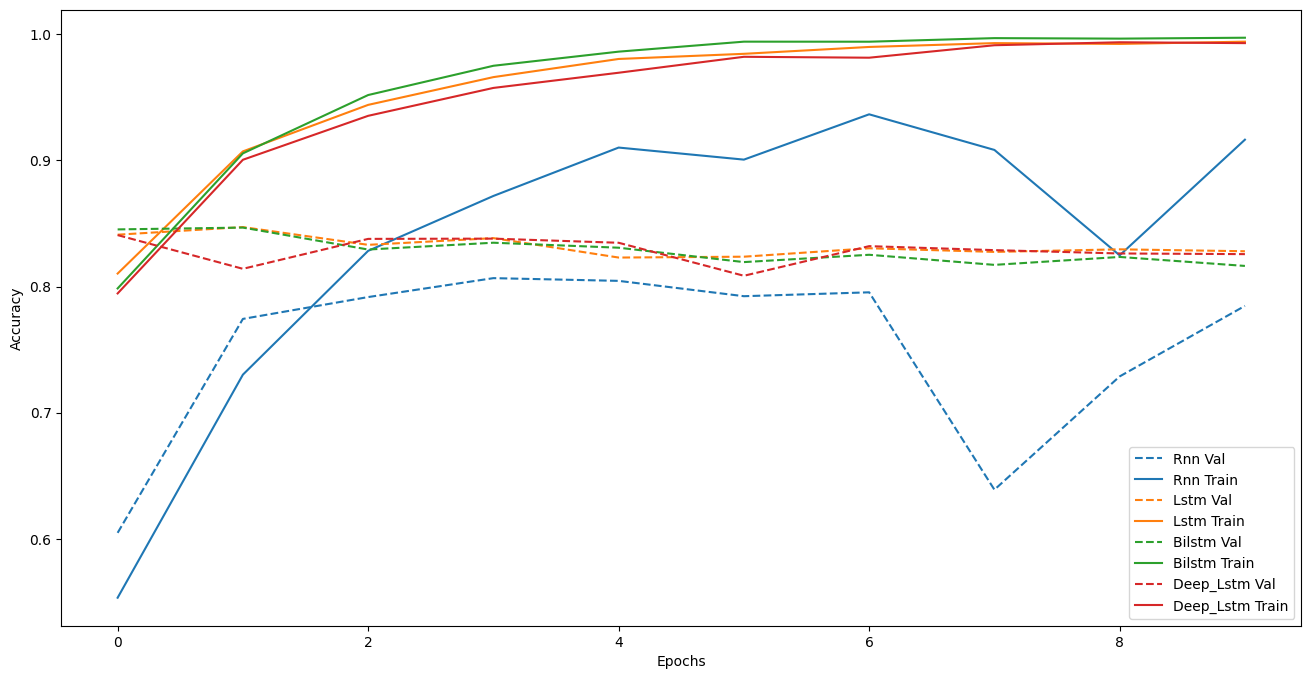

In [7]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                       '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_history([('rnn', history_rnn), ('lstm', history_lstm), ('bilstm', history_bilstm), ('deep_lstm', history_deep_lstm)])
plt.show()
